In [1]:
import pandas as pd

# Replace 'path_to_file' with the path to your CSV file
df = pd.read_csv('azerbaijani_sentiment_dataset.csv')

# Assuming your DataFrame has columns 'text' for the text and 'label' for the sentiments
print(df.head())


                                        news_content     label
0  bakının nəsimi rayonunda qəza zamanı hamilə qa...  negative
1  bakının səbail rayonunda dənizdə boğulma hadis...  negative
2  gəncə şəhərində yol qəzası olub arb kəpəzə ist...  negative
3  masallıda yanğın olub masallı rayonu böyük xoc...  negative
4  bu gün bakı ağır cinayətlər məhkəmsində keçmiş...  negative


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords

azerbaijani_stopwords = stopwords.words('azerbaijani')

# Define the cleaning function
def clean_text(text, stopwords):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text.lower())
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = ' '.join(word for word in text.split() if word not in stopwords)
    else:
        text = ''
    return text

# Applying the cleaning function to the text
df['cleaned_text'] = df['news_content'].apply(lambda x: clean_text(x, azerbaijani_stopwords))

# Vectorizing the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

In [4]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Training the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)

In [8]:
# Evaluating the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100}%")
print(f"Report: \n{report}")

Accuracy: 93.61179361179362%
Report: 
              precision    recall  f1-score   support

    negative       0.96      0.94      0.95      1546
    positive       0.90      0.93      0.91       896

    accuracy                           0.94      2442
   macro avg       0.93      0.94      0.93      2442
weighted avg       0.94      0.94      0.94      2442



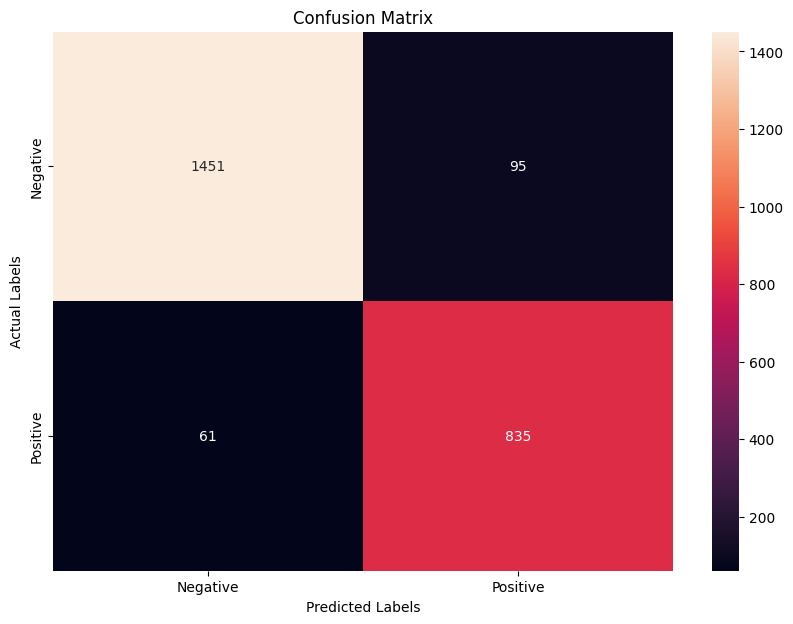

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()